In [1]:
'''
Testscript to invistigate various feature importance techniques for analysing prediction results of different ML methods
Feature importance techniques:
1) Impurity-based feature importance
2) Permutation feature importance
3) SHAP
'''

import numpy as np
import pandas as pd
import os
import joblib
from pygam import GAM, LinearGAM
import nbimporter
from Plots import *
from Prediction import *
from Feature_Importance import *
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Load Data

In [2]:
# Set the working directory
os.chdir("N:/WG_ENRI/20_projects/Noise2NAKO/04_data/grid_prediction/3_output")

In [3]:
# Read training and test data
data_training_path = 'Prediction_data/Reduced_data_imp/Reduced_data_imp_meanPollutant_SSel_minmax_scaled_Training_data.csv'
data_test_path = 'Prediction_data/Reduced_data_imp/Reduced_data_imp_meanPollutant_SSel_minmax_scaled_Test_data.csv'
data_training = pd.read_csv(data_training_path, sep=',')
data_test = pd.read_csv(data_test_path, sep=',')

In [4]:
# distinguish between response and input variables and make training and validation data 

output_variable = 'cvd_mortality_17'
# 0_original_data
# 1_standard_scaled_data
# 2_minmax_scaled_data
output_path = 'CVD Mortality Rate 2017_allExposures_XY/Reduced_data_imp_meanPollutant/2_minmax_scaled_data'

output_path = '../5_results/' + output_path + '/'
y = data_training[output_variable]
X = data_training.drop([output_variable, 'id'], axis = 1)   
y_test = data_test[output_variable]
X_test = data_test.drop([output_variable, 'id'], axis = 1)
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 10)
features = X.columns

### Build-Train or load already trained models

In [ ]:
# Build and train all the models for all specified methods and save them for the future
# It is gonna make a folder named 'trained_models' in the working directory and save the built and trained models there

methods = ['LR', 'LR_Ridge', 'LR_Lasso', 'LR_Elastic', 'GAM', 'KNN', 'SVM', 'RF', 'AdaB', 'XGBoost', 'MLP']
models = Build_fit_all_methods(methods, X, y)

In [6]:
# Example for loading already trained models
methods = ['LR', 'LR_Ridge', 'LR_Lasso', 'LR_Elastic', 'KNN', 'SVR', 'RF', 'AdaB', 'XGBoost', 'MLP']
models = []
for method in methods:
    model = load_model(output_path + 'trained_models/' + method + '_trained_model.sav')
    models.append(model)

# Impurity-based Feature Importance

In [ ]:
# feature importance for training data using already built models

impurity_feature_imp = Apply_impurity_feature_importance(methods, X_train, y_train, output_path, 'Trainig', models = models)
feature_imp_thr_plot_bar(impurity_feature_imp, 0.01, output_path, 'imp_training')

# Permutaion Feature Importance

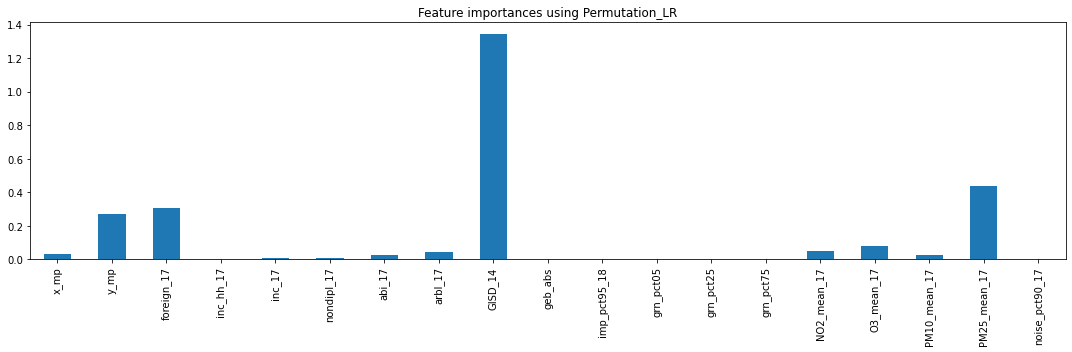

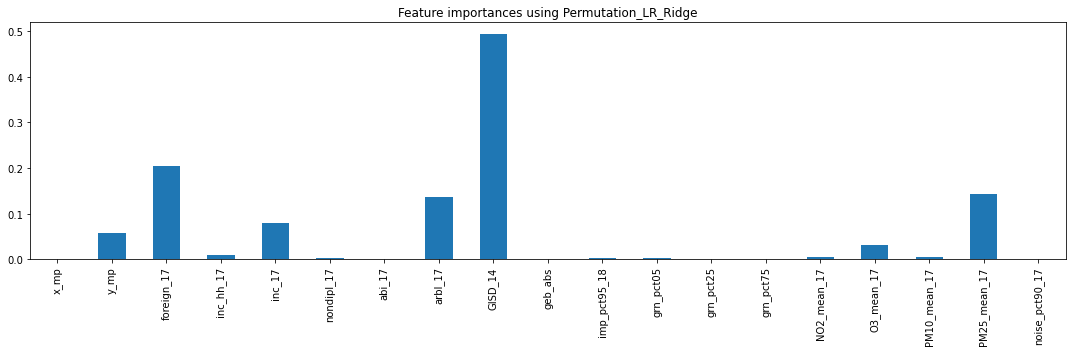

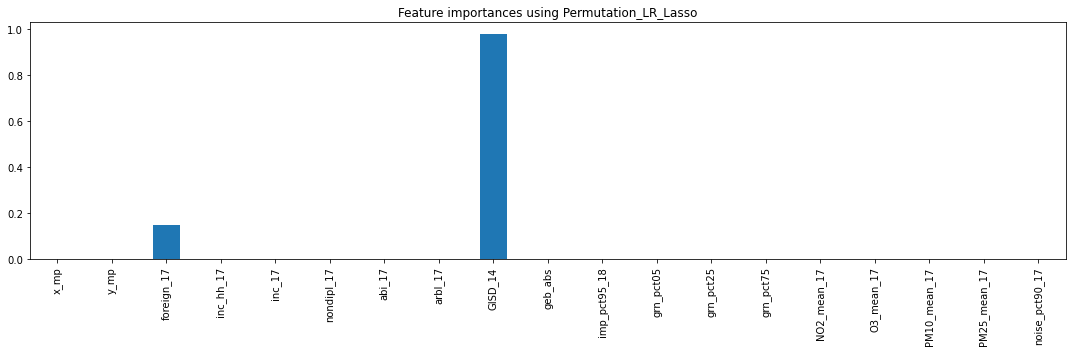

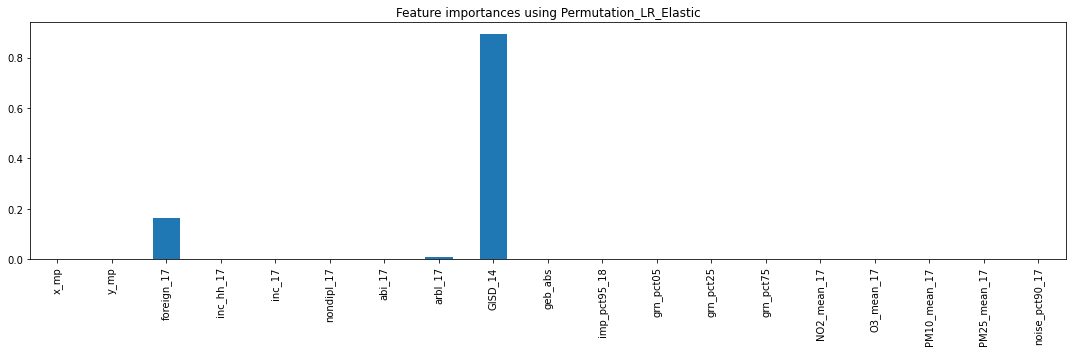

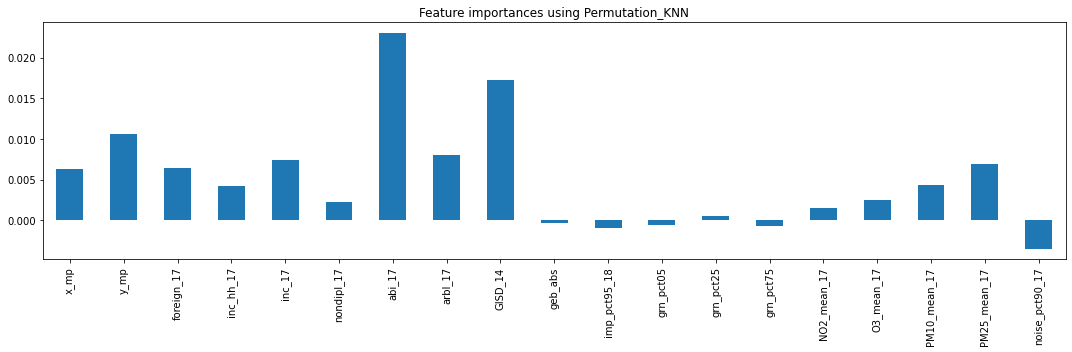

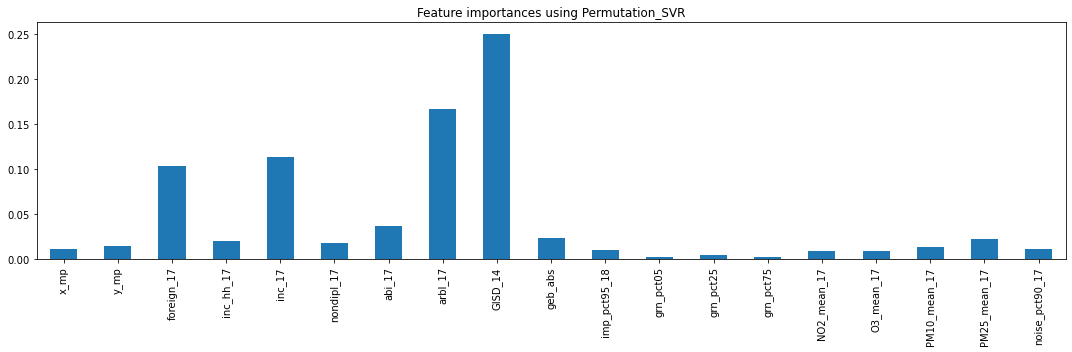

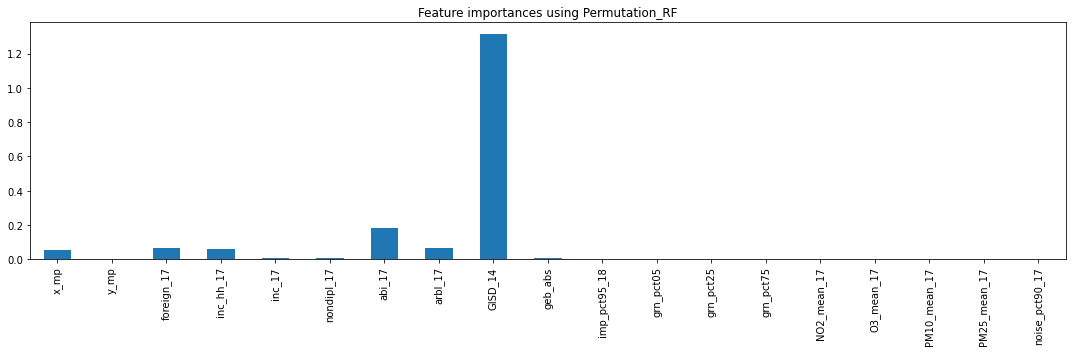

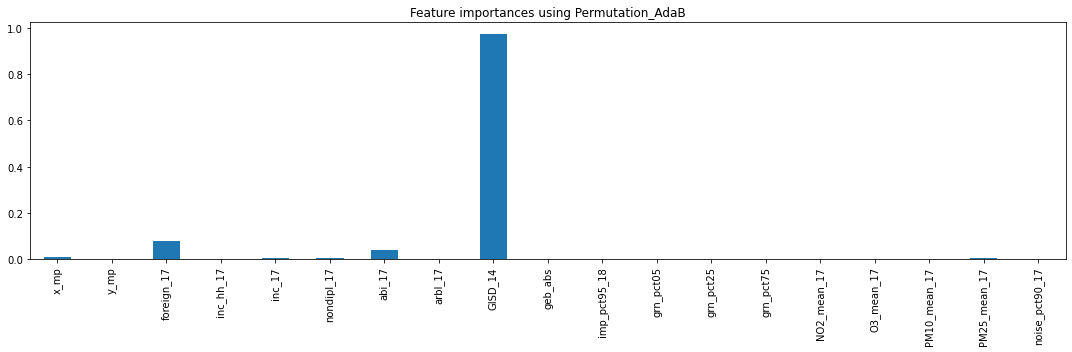

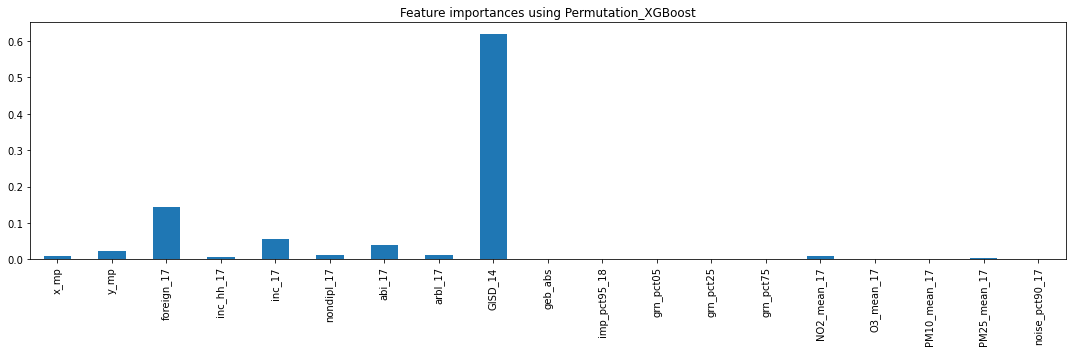

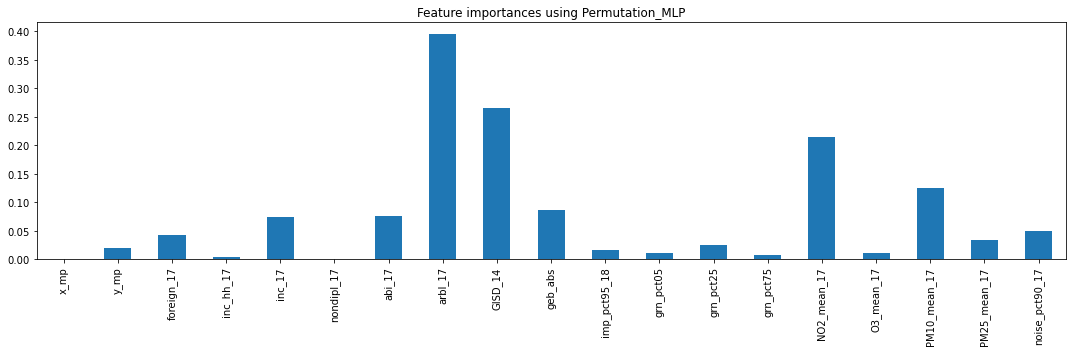

../5_results/CVD Mortality Rate 2017_allExposures_XY/Reduced_data_imp_meanPollutant/2_minmax_scaled_data/Plots/Feature_importance_bar_001_permutation_training


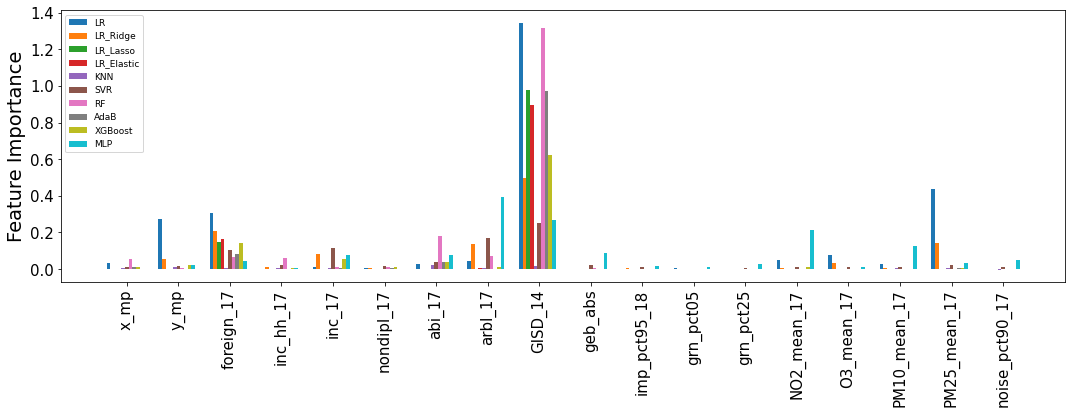

../5_results/CVD Mortality Rate 2017_allExposures_XY/Reduced_data_imp_meanPollutant/2_minmax_scaled_data/Plots/Feature_importance_bar_all_permutation_training


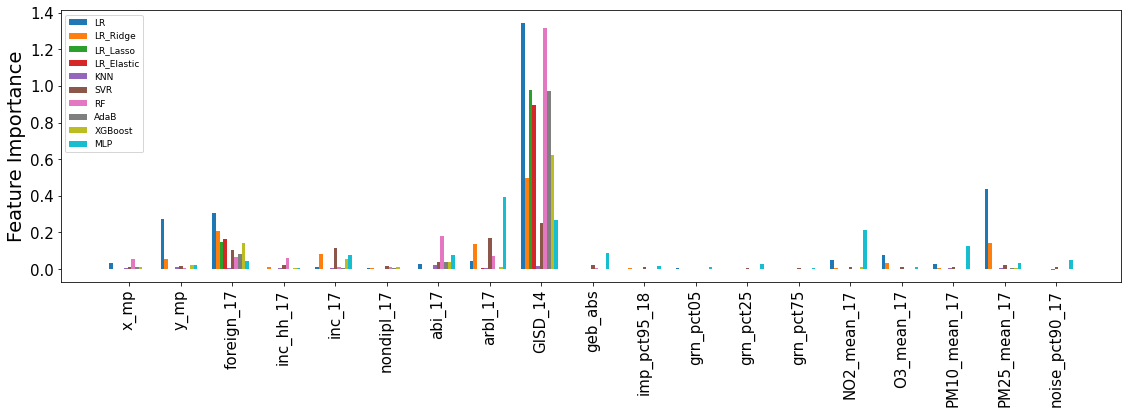

In [34]:
# feature importance for training data using already built models, if the models argument is empty the algorithm starts
# building and training the model from scratch

permutation_feature_imp = Apply_permutation_feature_importance(methods, X, y, X, y, output_path, 'Trainig',
                                                            models = models)
feature_imp_thr_plot_barr(permutation_feature_imp, 0.01, output_path, 'permutation_training')

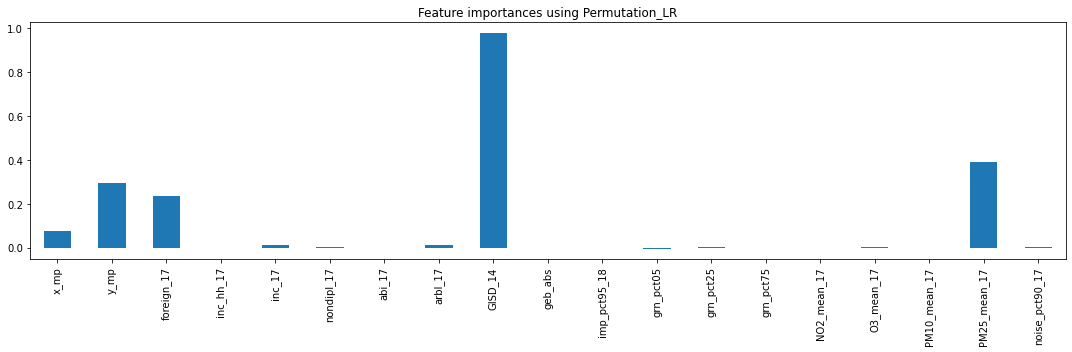

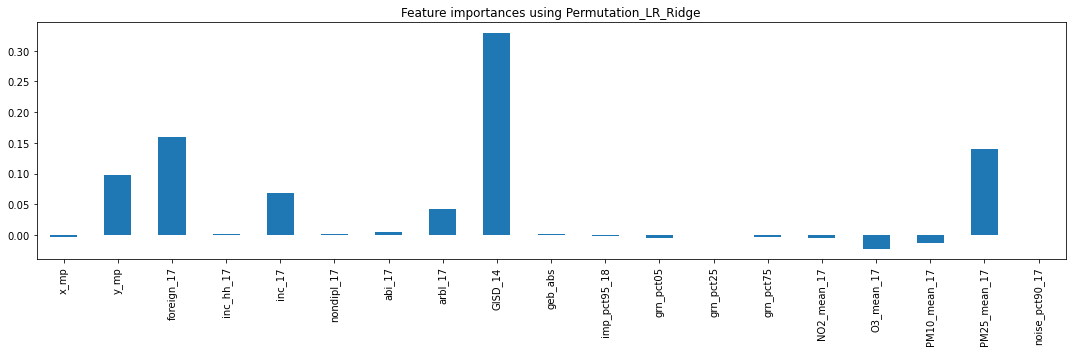

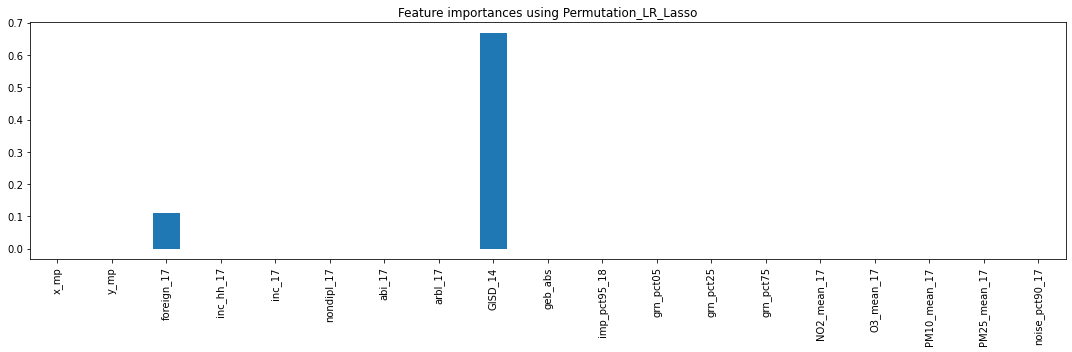

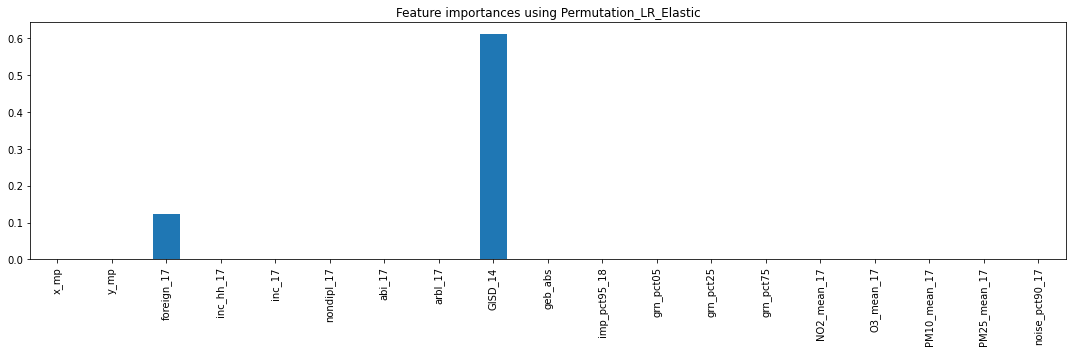

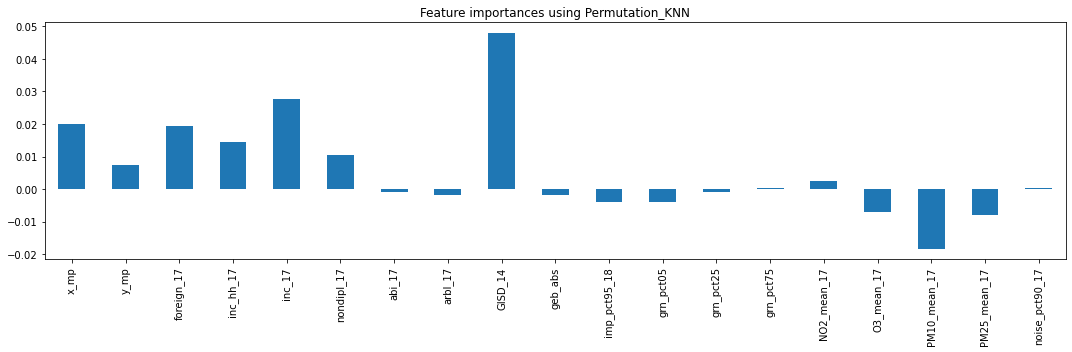

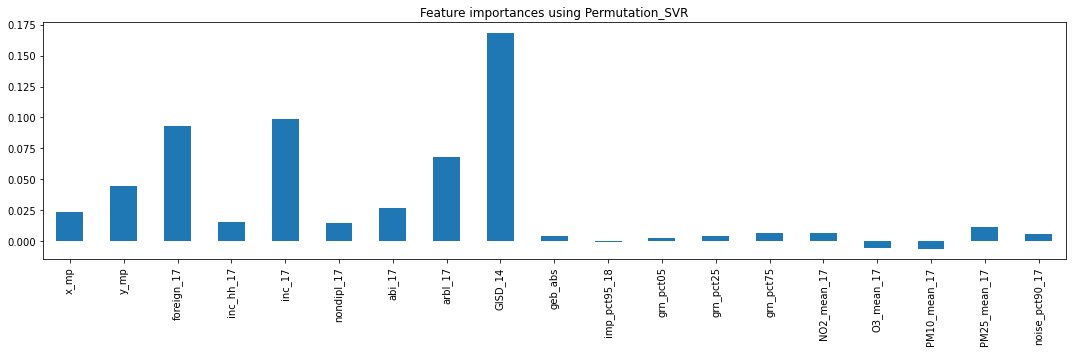

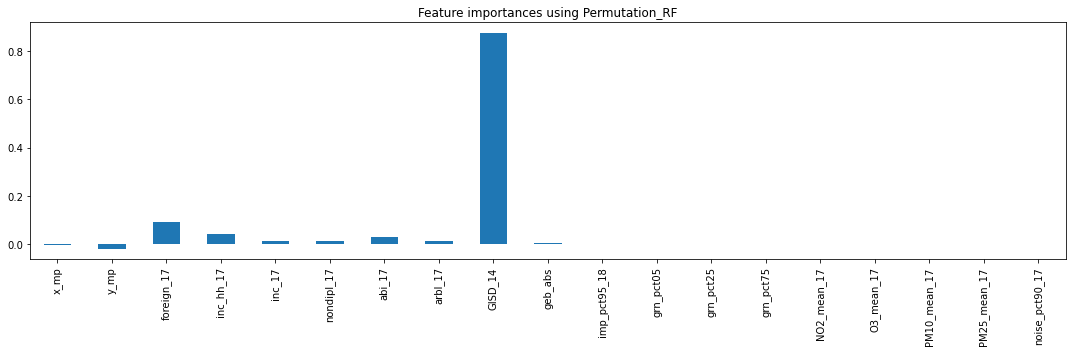

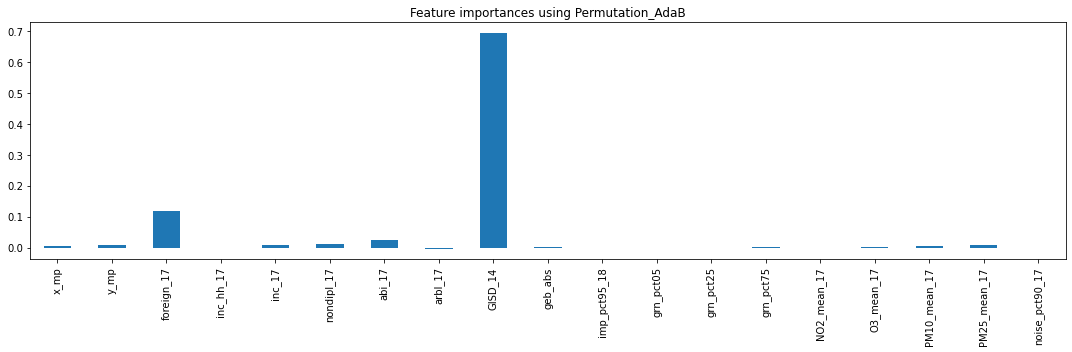

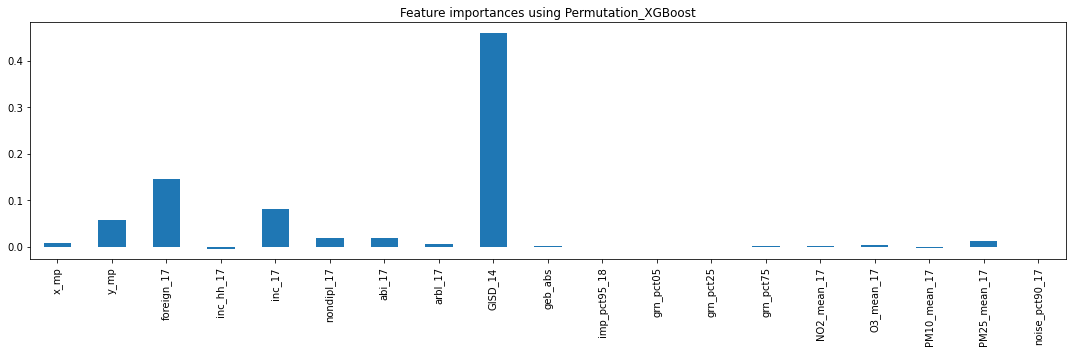

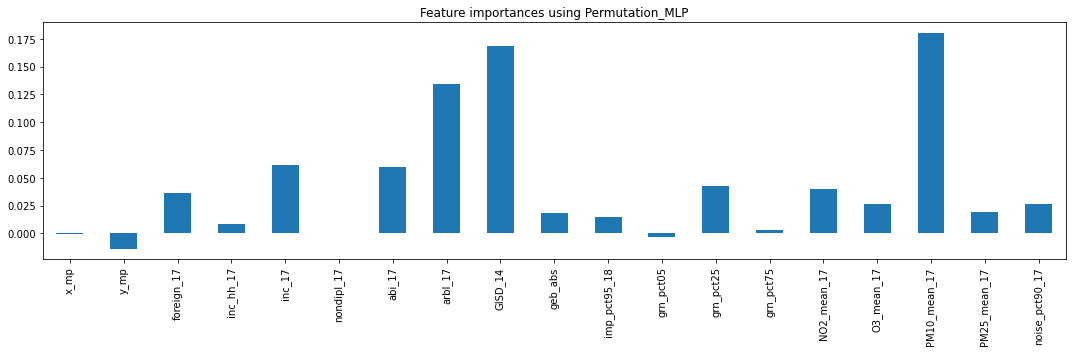

../5_results/CVD Mortality Rate 2017_allExposures_XY/Reduced_data_imp_meanPollutant/2_minmax_scaled_data/Plots/Feature_importance_bar_001_permutation_Test


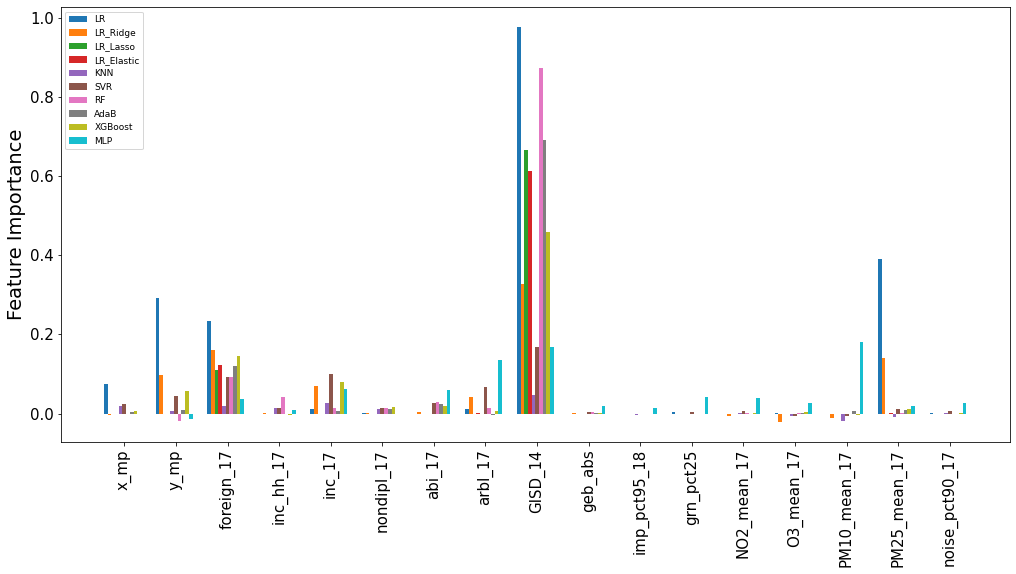

../5_results/CVD Mortality Rate 2017_allExposures_XY/Reduced_data_imp_meanPollutant/2_minmax_scaled_data/Plots/Feature_importance_bar_all_permutation_Test


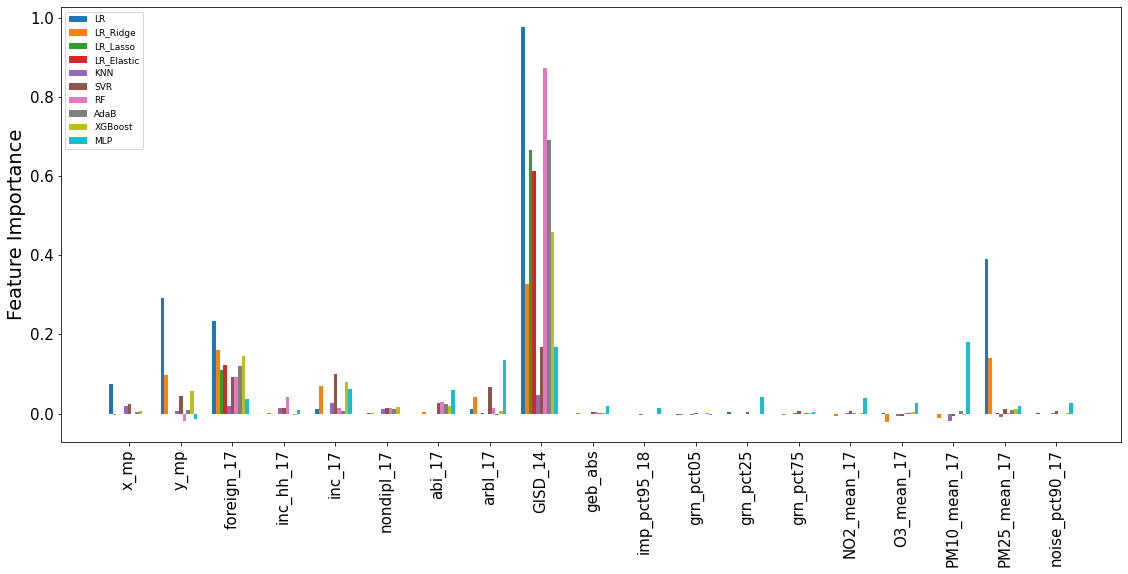

In [8]:
# feature importance for training data using already built models, if the models argument is empty the algorithm starts
# building and training the model from scratch

permutation_feature_imp = Apply_permutation_feature_importance(methods, X, y, X_test, y_test, output_path, 'Test',
                                                            models = models)
feature_imp_thr_plot_bar(permutation_feature_imp, 0.01, output_path, 'permutation_Test')

# SHAP

In [ ]:
# Shap feature importance for training data using already built models, if the models argument is empty the algorithm starts
# building and training the model from scratch

shap_feature_imp_training = Apply_shap_global_feature_importance(methods, X, y, X, y, output_path,
                                                                 'Training', models = models, metric = 'mean')
feature_imp_thr_plot_bar(shap_feature_imp_training, 0.01, save_here, 'shap_Training')

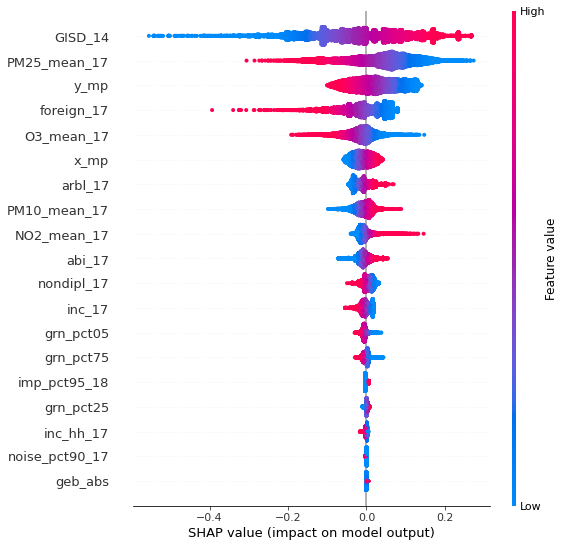

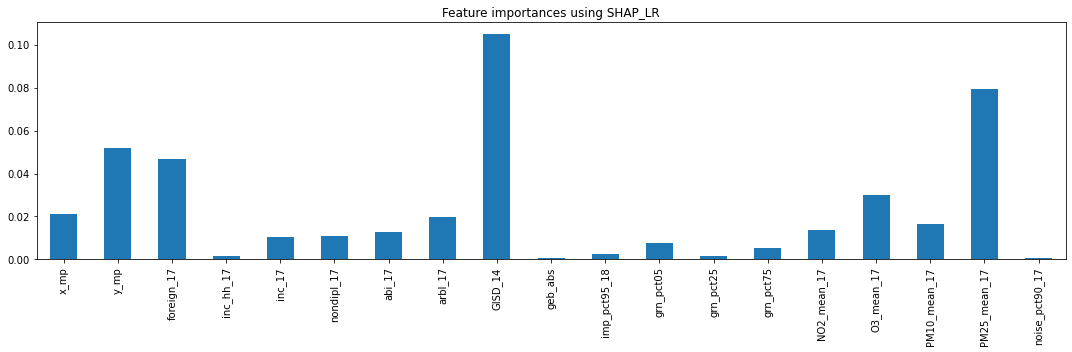

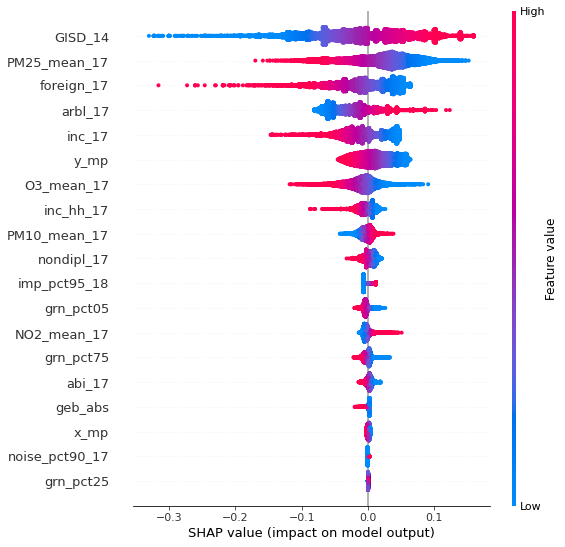

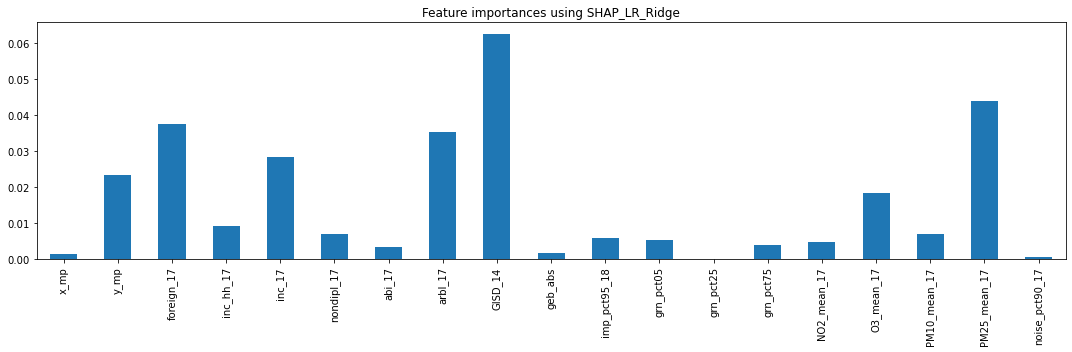

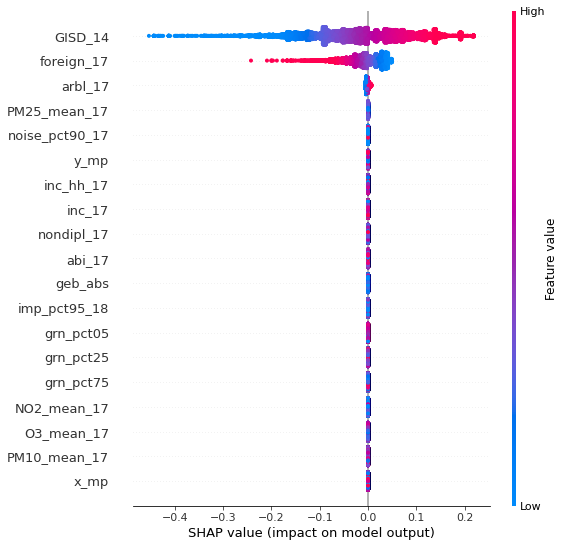

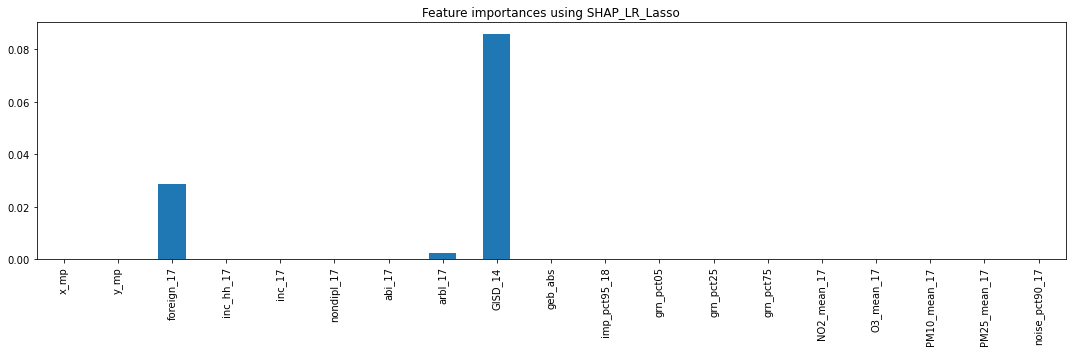

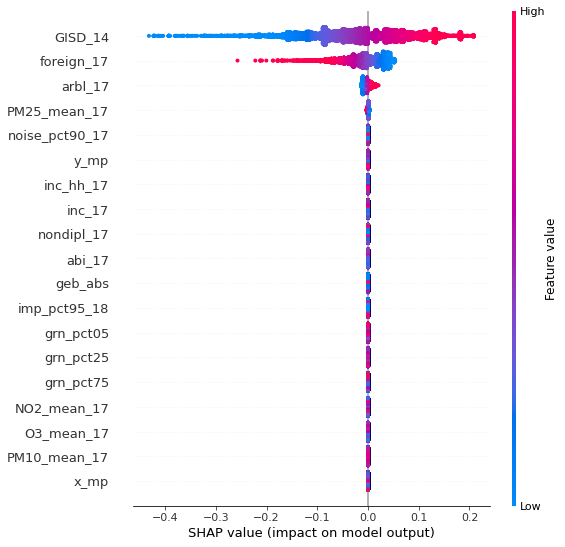

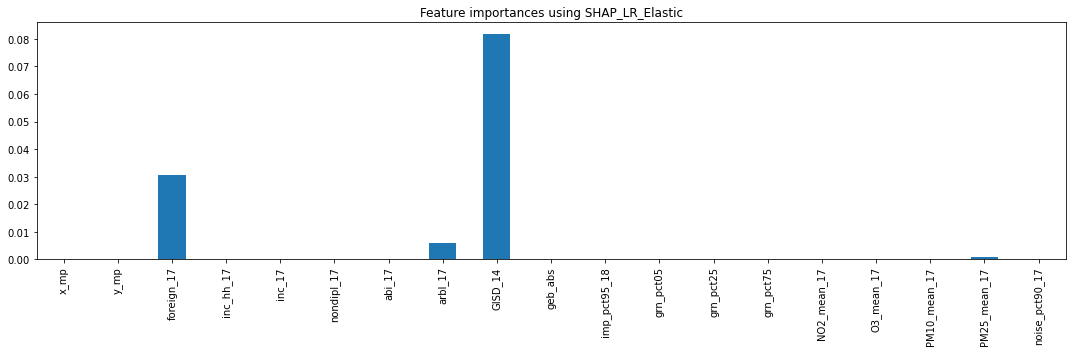

In [ ]:
# Shap feature importance for test data using already built models, if the models argument is empty the algorithm starts
# building and training the model from scratch

shap_feature_imp_training = Apply_shap_global_feature_importance(methods, X, y, X_test, y_test, output_path,
                                                                 'Test', models = models, metric = 'mean')
feature_imp_thr_plot_bar(shap_feature_imp_training, 0.01, save_here, 'shap_Test')